In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Intro to machine learning. Classification

Good articles to read: 

[MachineLearningForBeginners](https://towardsdatascience.com/introduction-to-machine-learning-for-beginners-eed6024fdb08)

[AnotherMLForBeginners](https://towardsdatascience.com/machine-learning-for-beginners-d247a9420dab)

[GreatMachineLearningCource](https://www.coursera.org/learn/machine-learning)


In general, "machine learning is a field of study that gives the ability to the computer for self-learn without being explicitly programmed" -  [Arthur Samuel](http://www.contrib.andrew.cmu.edu/~mndarwis/ML.html)

Machine learnig can be can be separated on two classes: supervised and unsupervised learning. Supervised learnig is a learning with teacher, where we learn the model using the training examples. Unsupervised learning tries to derive data patterns without explicitly specifying rules. 

In the following workshop we will be concentraing on supervised learning. One of tasks that machine learning solves is the classification problem. Classification is an area of machine learning that gives computers the ability to automatically classify data. For example, some classification algorithms can recognize pictures and separate dogs from cats, another algorithms can split emails on spam and non-spam. In this exercise we will recognize hand written digits.




In this notebook, you'll learn how to use scikit-learn to do machine learning classification on the MNIST database of handwritten digits. 

![title](../images/mnist-initial.png)


The MNIST dataset is a well-known dataset consisting of 28x28 grayscale images. For each image, we know the corresponding digits (from 0 to 9). It is available here: http://yann.lecun.com/exdb/mnist/index.html
While this tutorial uses a classifier called Logistic Regression, the coding process in this tutorial applies to other classifiers in sklearn (Decision Tree, K-Nearest Neighbors etc). In this noteboook, we use Logistic Regression to predict digit labels based on images. The image above shows a bunch of training digits (observations) from the MNIST dataset whose category membership is known (labels 0–9). After training a model with logistic regression, it can be used to predict an image label (labels 0–9) given an image. First lets load the data using mnist package

### Download mnist set

In [5]:
!pip install mnist

First, we import the tools we will need:

Numpy: data manipulation

SciPy: 
SciPy uses NumPy arrays as the basic data structure, and comes with modules for various commonly used tasks in scientific programming, including linear algebra, integration (calculus), ordinary differential equation solving, and signal processing.

Pandas: data storage & manipulation

SKLearn: Machine Learning framework

Seaborn: Creating vizualizations

In [6]:

import mnist
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

import seaborn as sns


### Explore data by splitting our data into train and test set

In [7]:

# get the train data
train_images = mnist.train_images()
train_labels = mnist.train_labels()

# get test data
test_images = mnist.test_images()
test_labels = mnist.test_labels()

num_inputs = 28 * 28


In [8]:
print('train data shape', train_images.shape)
print('train label shape', train_labels.shape)

print('test data shape', test_images.shape)
print('test label shape', test_labels.shape)


train data shape (60000, 28, 28)
train label shape (60000,)
test data shape (10000, 28, 28)
test label shape (10000,)


This proves in training we have 60000 images and each image is 28x28 dimension

Now lets take a look at the training images

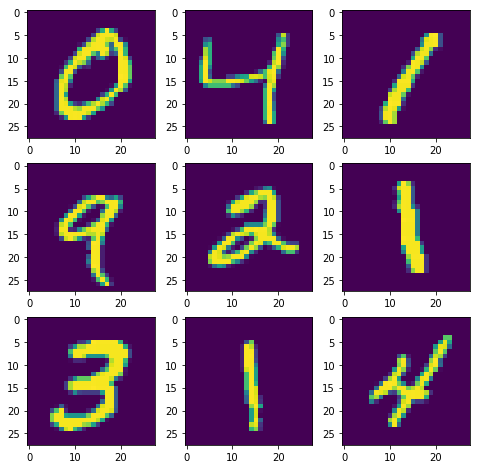

In [27]:

def print_digits(data_set, cols = 3, rows = 3):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, cols*rows +1):
        img = data_set[i]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
    plt.show()
    
print_digits(train_images)



In [10]:
# look at the input format - You see a numerical represantion of the images of the handwritten digits

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Preprocess data, normalization

In [14]:

x_train = train_images.reshape(-1,28*28)/255
y_train = train_labels

x_test = test_images.reshape(-1,28*28)/255
y_test = test_labels



In [15]:
print('length of the text examples', len(x_train),len(y_train))
print('length of the text examples', len(x_test),len(y_test))

length of the text examples 60000 60000
length of the text examples 10000 10000


### Building Logistic regression with sklearn

Step 1. Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

Over here we are importing LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.linear_model import LogisticRegression



The next line defines the logistic regression classifier. Since we have multiple outputs(10, for each digit), we need to use multi class classifier. Ove versus All is the simplest multilable classifier.


Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to create a classifier. 
Use l2 regulariazation (https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c) , and One Vs ALL classifier, since it is a multi class problem

In [17]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it

# Turn up tolerance for faster convergence
clf = ## Enter your code here


Step 3. Training the model on the data, storing the information learned from the data

Model is learning the relationship between digits and labels

Invoke fit function on x_train and y_train

In [18]:

clf.fit(x_train, y_train)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.1, verbose=1, warm_start=False)

Lets now talk about regularazation. Regularization can be considered as a penalty against complexity. Increasing the regularization strength penalizes "large" weight coefficients -- our goal is to prevent that our model picks up "peculiarities," "noise," or "imagines a pattern where there is none."

Again, we don't want the model to memorize the training dataset, we want a model that generalizes well to new, unseen data.

In [19]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(x_test, y_test)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)


Sparsity with L2 penalty: 8.55%
Test score with L2 penalty: 0.9105


now, lets try to predict the test data. use predict method to make predicitons on your x_test data

In [ ]:
predictions = ## your code is here


The following cell builds the confusion matrix to see how well our classifier works.

[ConfusionMatrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

In [20]:


cm = metrics.confusion_matrix(y_test, predictions)

print(cm)


[[ 960    0    0    1    0    3    9    2    5    0]
 [   0 1104    2    2    1    2    4    2   18    0]
 [  10   12  910   15   11    2   14   17   36    5]
 [   3    1   21  919    1   20    4   10   22    9]
 [   1    7    6    1  902    1    9    1   10   44]
 [  15    3    3   39   12  747   20   11   28   14]
 [   8    3    4    2   11   12  912    2    4    0]
 [   4   15   22    4    9    2    1  937    1   33]
 [   9   17    7   15   14   34   13   13  844    8]
 [  10    9    4   13   49    8    0   32   14  870]]


Now lets plot the confusion matrix 

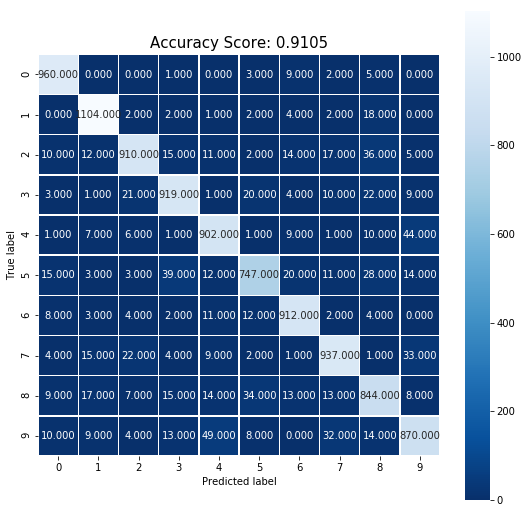

In [21]:

def plot_confusion_matrix(cmatrix, score):
    plt.figure(figsize=(9,9))
    sns.heatmap(cmatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    
def evaluate_confusion_matrix(y_test, predictions):
    return metrics.confusion_matrix(y_test, predictions)

def evaluate_and_plot_confusion_matrix(y_test, predictions, score):
    plot_confusion_matrix(evaluate_confusion_matrix(y_test, predictions), score)

    
evaluate_and_plot_confusion_matrix(y_test, predictions, score)



Lest print some misclassified digits.

Create a function that returns list of indexes that misclassified on the test examples

In [ ]:
def calculate_miclassified(x_test, y_test, clf):
    misclassified_inds = []
    ### Your code is here
    return misclassified_inds


Using these indexes we will print random samples of misclassified images

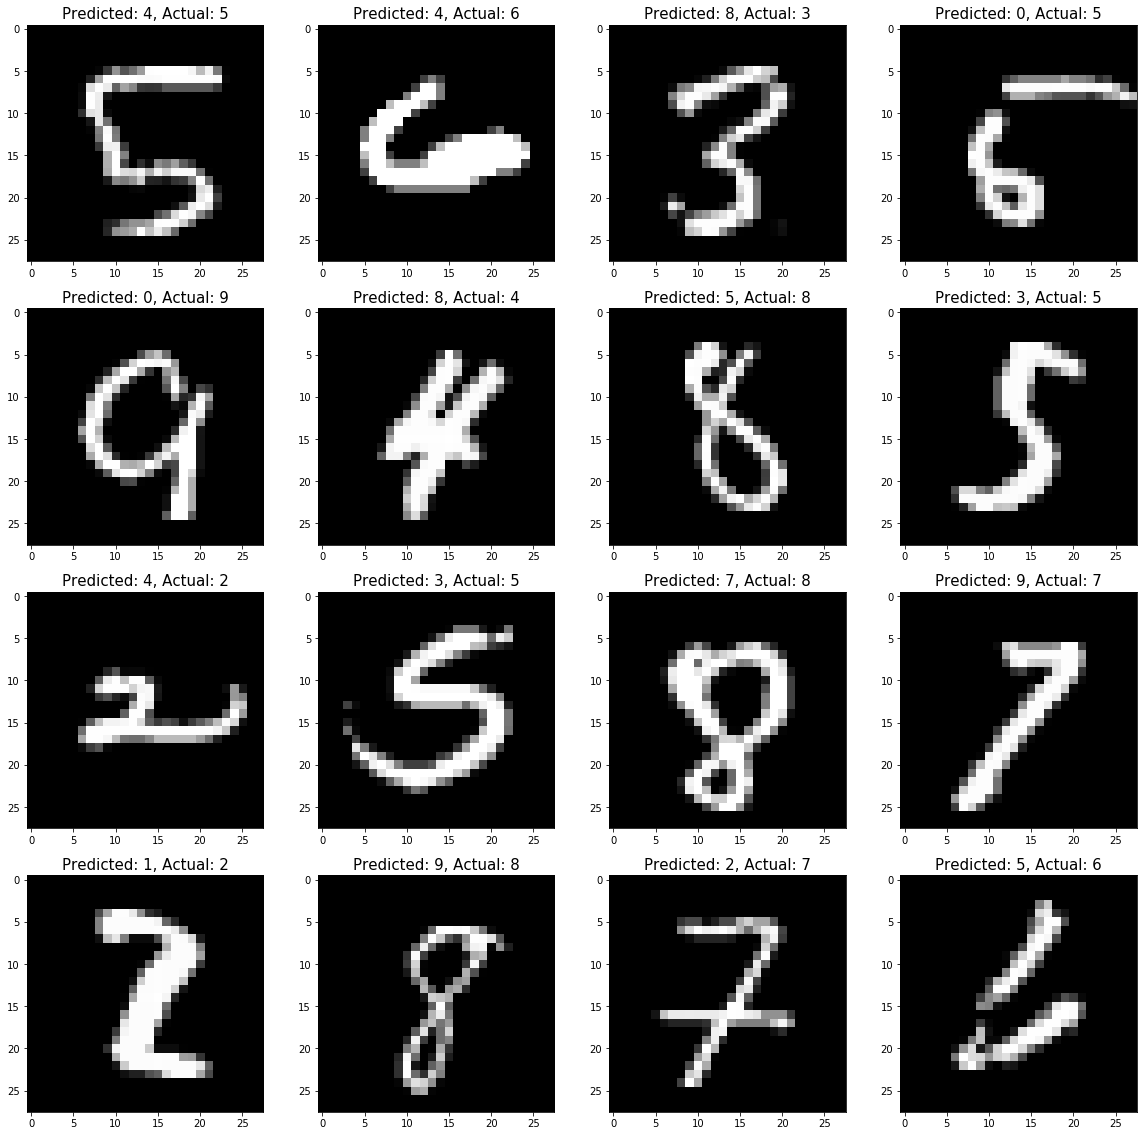

In [36]:

import numpy as np 
from random import sample
import matplotlib.pyplot as plt


def plot_random_samples(x_test, y_test, predictions, misclassified_inds, cols = 4, rows = 4):
    num_images = cols * rows
    random_indexes = sample(misclassified_inds, num_images)
    fig=plt.figure(figsize=(20, 20))
    for i in range(1, cols*rows +1):
        img_index = random_indexes[i-1]
        img = np.reshape(x_test[img_index], (28,28))
        fig.add_subplot(rows, cols, i)
        plt.imshow(img, cmap=plt.cm.gray)
        plt.title('Predicted: {}, Actual: {}'.format(predictions[img_index], y_test[img_index]), fontsize = 15)
    plt.show()
    
misclassified_inds = calculate_miclassified(x_test, y_test, clf)
    
plot_random_samples(x_test, y_test, predictions, misclassified_inds)

### Conclusions

So far we build our classifier, that can predict recognize hand written digits with ~88% accuracy. This is pretty good for starters, but it is just the beginning. Top hand written digit classifiers have accuracy almost 100% ! 


If you want to improve your classifier, you can follow this blogpost: https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a

### Implementing Logistic classification from scratch

The following section contains the simple implementation of the classificator from scratch. 

Note: this is an advanced topic and you can skip if you are not interested in the internals

Algorithm
Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category.

Hypothesis
A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as softmax.
n.



### Softmax

Softmax function calculates the probabilities distribution of the event over ‘n’ different events. This function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs. The output probabilities range will be between 0 to 1, and the sum of all the probabilities will be equal to one. If the softmax function is used for multi-classification model it returns the probabilities of each class and the target class will have the high probability.

The formula computes the exponential (e-power) of the given input value and the sum of exponential values of all the values in the inputs. Then the ratio of the exponential of the input value and the sum of exponential values is the output of the softmax functio

In [37]:

def softmax(z):
    """
    The softmax function
    Arguments:
    z -- a k-length vector (float)
    Return:
    result -- the softmax function evaluated on z, returning a set of probability  of length k
    """
    result = 1/sum(np.exp(z)) * np.exp(z)
    return result



### One Hot encoding

One hot encoding is a representation of categorical variables as binary vectors. This first requires that the actual values be mapped to integer values. Then each integer value is represented as a binary vector that is all zero values except the index of the integer which is marked with a 1.

In [38]:

def one_hot_encode(y):
    """
    One hot encodings
    Arguments:
    y -- number between 0 and 9 that represents the digit
    Return:
    result -- 10 digit array, where all values but one is zero.
    """
    vector = np.array([0]*10)
    vector[y] = 1
    return vector


### Gradient

In [190]:

def gradient(w, x, y):
    """
    The gradient 
    Arguments:
    w -- weights, an ndarray of size (num_outputs, num_inputs)
    x -- graphic data, a numpy array of size (num_inputs) -- the MNIST data representing pixels
    y -- true "label" corresponding to x (float)
    Return:
    (-1)*grad -- negative gradient of the loss with respect to w, thus same shape as w
    """
    
    y_encoded = one_hot_encode(y)
    z = np.matmul(w, x)
    A = (y_encoded - softmax(z))
    grad = np.zeros(w.shape)
    
    for i in range(0,len(x)):
        grad[:,i] = x[i]*A
        
    return (-1) * grad


### Weight Initialization

In [175]:

def initialize(num_outputs,num_inputs):
    """
    Initializing random weights w
    
    Return: 
    w -- weights, an ndarray of size (num_outputs, num_inputs)
    """
    return np.random.randn(num_outputs,num_inputs) / np.sqrt(num_inputs)



In [177]:

def train(X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
    """
    The stochastic gradient descent model 
    Arguments:
    X_train -- x_train data set, a 2darray of float in shape (num_training_data, num_inputs)
    Y_train -- y_train data set, a vector of float in shape (num_training_data,)
    num_iterations -- number of iterations to have
    learning_rate -- size of base learning rate
    Return:
    w -- the weights after optimization, an 2darray of size (num_outputs, num_inputs)
    """
    # initialize the random weights
    w = initialize(num_outputs,num_inputs)
    
    # generate a random list of indices for the training set
    train_size = len(X_train)
    rand_indices = np.random.choice(train_size, num_iterations, replace=True)

    for i in rand_indices:
        w = w - gradient(w,X_train[i],Y_train[i]) * learning_rate
    return w 



### Predict

In [ ]:

def predict (w, x):
    """
    Predict y based on fitted weights and x
    Arguments:
    w -- the weights after optimization, an 2darray of size (num_outputs, num_inputs)
    x -- graphic data for testing, a numpy array of size (num_inputs) -- the MNIST data representing pixels
    Return:
    result -- predicted "label" corresponding to x (float)
    """
    dist = softmax(np.matmul(w, x))
    result = np.argmax(dist)
    return result


### Test

In [243]:

def testing(w, X_test, Y_test):
    """
    Test the model 
    Arguments:
    w -- the weights after optimization, an 2darray of size (num_outputs, num_inputs)
    X_test -- x_test data set, a 2darray of float in shape (num_testing_data, num_inputs)
    Y_test -- y_test data set, a vector of float in shape (num_testing_data,)
    """
    total_correct = 0
    for n in range(len(X_test)):
        y = Y_test[n]
        x = X_test[n][:]
        prediction = predict (w , x)
        if (prediction == y):
            total_correct += 1
    # print('Accuarcy Test: ',total_correct/np.float(len(X_test)))
    return total_correct/np.float(len(X_test))


### Running logistic regression

In [244]:

#Implementation of stochastic gradient descent algorithm
#number of inputs
num_inputs = 28*28
#number of outputs
num_outputs = 10

lr = 0.03
num_iter = 8000

w = train(x_train, y_train, num_iterations = num_iter, learning_rate = lr)
print('Model #', (n,l))
print('Number of iterations =',n)
print('Learning Rate =',l)
print('Accuarcy Test: ',testing(w,x_test,y_test))
print('################################')

        

Model # (8000, 0.03)
Number of iterations = 8000
Learning Rate = 0.03
Accuarcy Test:  0.8811
################################


### Mnist classification using mini-batch approach(slow)

### One hot encoding(vector version)

In [ ]:

def one_hot_encode_vect(Y):
    vector = np.zeros((len(Y), 10))
    for i in range(0, len(Y)):
        vector[i][Y[i]] = 1
    return vector


one_hot_encode_vect([9,4])


### Gradient - mini batch version

In [253]:

def gradient_minibatch(W, X, Y):
    """
    The gradient 
    Arguments:
    w -- (num_outputs, num_inputs) weights, an ndarray of size (num_outputs, num_inputs)
    x -- (mini_batch,  num_inputs) graphic data, a numpy array of size (num_inputs) -- the MNIST data representing pixels
    y -- (mini_batch) true "label" corresponding to x (float)
    Return:
    (-1)*grad -- (num_outputs, num_inputs) negative gradient of the loss with respect to w, thus same shape as w
    """
    
    Y_encoded = one_hot_encode_vect(Y)
    Z = np.matmul(W, X.T)
    A = (Y_encoded.T - softmax(Z))
    grad = np.matmul(A,X)/mini_batch
    return (-1) * grad


In [252]:

w_t = initialize(10,3)
x_t = np.zeros((4,3))
y_t =[1,2,3,4]


gradient_minibatch(w_t,x_t,y_t)

(10, 4)


array([[-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.]])

### Train loop - mini batch version

In [246]:

def train_mini_batch(X_train, Y_train, num_iterations = 1000, learning_rate = 0.5, mini_batch = 64):
    """
    The stochastic gradient descent model 
    Arguments:
    X_train -- x_train data set, a 2darray of float in shape (num_training_data, num_inputs)
    Y_train -- y_train data set, a vector of float in shape (num_training_data,)
    num_iterations -- number of iterations to have
    learning_rate -- size of base learning rate
    Return:
    w -- the weights after optimization, an 2darray of size (num_outputs, num_inputs)
    """
    # initialize the random weights
    w = initialize(num_outputs,num_inputs)
    
    # generate a random list of indices for the training set
    train_size = len(X_train)
    
    num_batches = int(len(X_train)/mini_batch)
    
    print('Executing total batches:', num_batches)
    
    for idx in range(num_iterations):
        for num_batch in range(num_batches):
            X_train_batch = X_train[num_batch:(num_batch+1)*mini_batch]
            Y_train_batch = Y_train[num_batch:(num_batch+1)*mini_batch]
            grad = gradient_minibatch(w,X_train_batch,Y_train_batch)
            w = w - grad * learning_rate
        print('Finished iteration: ',idx)
    return w 



In [ ]:

#Implementation of stochastic gradient descent algorithm
#number of inputs
num_inputs = 28*28
#number of outputs
num_outputs = 10

lr = 0.03
num_iter = 3

w = train_mini_batch(x_train, y_train, num_iterations = num_iter, learning_rate = lr)
print('Model #', (num_iter,lr))
print('Accuarcy on Test: ',testing(w, x_test, y_test))
        


Executing total batches: 937


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply


Finished iteration:  0
